This notebook uses and explains the Lower Level Python API on TensorFlow. 95% of the time you will be using tf.models or tf.data. The lower level API allows you to write **custom** loss functions, metrics, layers, models, initializers, regularizers, weight constraints and more. 

Each TensorFlow operation is implemented using high efficient C++ code.

**GPU** can run many threads by splitting computations into many smaller chunks and running them in parallel. 
**TPU**, Tensor processing units, are even faster because they are specifically designed for Deep learning applications with their custom ASIC chips. 

TensorFlow can be run on multiple languages (C++, Java, Go etc.) and even operate across multiple devices. You can run models in your browser and use Android or iOS too! 

TensorFlow is not just a library, we can also use it for the following:
1. **Tensorboard** for Visualization
2. **TensorFlow Extended** (TFX) for model deployment and productionize TensorFlow projects including tools that can carry out data validation, preprocessing, model analysis, and serving (TF Serving).
3. **TensorFlow Hub** is a place where you can download pretrained neural networks. 

You should always checkout the TensorFlow resources as it contains hundreds of projects and existing code for many applications. It is likely someone as done something you are trying to do and you can use.
Go to https://tfhub.dev/, https://github.com/jtoy/awesome-tensorflow, https://paperswithcode.com/ 


In [1]:
from tensorflow import keras
import tensorflow as tf
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# Tensors and Operations
TensorFlow uses Tensors to flow from operation to operation - hence Tensorflow Numpy is very similiar to Tensor.

In [2]:
t = tf.constant([[1. ,2. ,3.], [4., 5., 6.]]) #matrix, just like Numpy ndarray
print(t)
print()
print(t.shape) #just like numpy
print()
print(t.dtype) #gives type
print()
print(t[1]) #returns second matrix
print()
print(t[:,:1]) #return 1 values of each row vector
print()

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)

(2, 3)

<dtype: 'float32'>

tf.Tensor([4. 5. 6.], shape=(3,), dtype=float32)

tf.Tensor(
[[1.]
 [4.]], shape=(2, 1), dtype=float32)



In [3]:
tf.constant(42) #scaler

<tf.Tensor: shape=(), dtype=int32, numpy=42>

In [4]:
t[..., 1, tf.newaxis] 
#'...' ellipses and basically mean insert the maximum number of :, see below 

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[2.],
       [5.]], dtype=float32)>

In [5]:
t[::, 2, tf.newaxis] #tf.newaxis transposes the result

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[3.],
       [6.]], dtype=float32)>

In [6]:
t +10 #matrix add, can also use tf.add(t, 10)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[11., 12., 13.],
       [14., 15., 16.]], dtype=float32)>

In [7]:
t @ [[1], [1], [1]] #matrix multiplication, can also use tf.mul(t, [[1], [1], [1]])

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[ 6.],
       [15.]], dtype=float32)>

**Numpy vs TensorFlow**

Even though the name of the functions seem to be same they are not. by using the TensorFlow operations, TensorFlow **creates a new tensor** instead of showing the same data like numpy. 

Switching between Numpy and TensorFlow is easy! And you even use tensor functions on numpy objects and visa versa.



In [8]:
a = np.array([[1, 2,34], [5,6,7]])
a

array([[ 1,  2, 34],
       [ 5,  6,  7]])

In [9]:
b= tf.constant(a) #convert numpy array into tensor 
b

<tf.Tensor: shape=(2, 3), dtype=int64, numpy=
array([[ 1,  2, 34],
       [ 5,  6,  7]])>

In [10]:
print(type(a))
print(type(b))

<class 'numpy.ndarray'>
<class 'tensorflow.python.framework.ops.EagerTensor'>


In [11]:
c=tf.square(a)
tf.cast(c, dtype=tf.int32) 


<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[   1,    4, 1156],
       [  25,   36,   49]], dtype=int32)>

In [12]:
np.square(b)

array([[   1,    4, 1156],
       [  25,   36,   49]])

**TensorFlows uses 32bit as its default** so make sure you set dtype=float32 when switching a numpy array to a tensor. The 32bit is for speed and less RAM use. You cannot even add or use any simple operation between float32 and float64 tensors! This is a great benefit as simple dtype mismatches can cause huge performances losses.

Tensors do not support item assignments (i.e. **Tensors are Immutable**) which makes these types of objects not ideal for keeping weights that need to change during backpropagation. 

Instead, we can use **tf.Variable, are mutable objects**. They are exactly the same as tf.Tensors but .assign(), .add() and .assign_sub() methods can be used.

```
# This is formatted as code
```



In [13]:
try:
  tf.constant(2.) + tf.constant(2) #tensorflow does not support this type of add
except tf.errors.InvalidArgumentError as exc:
  print(exc)


cannot compute AddV2 as input #1(zero-based) was expected to be a float tensor but is a int32 tensor [Op:AddV2]


In [14]:
try:
  t[0, 1] = 4.0 #tensorflow does not support item assignment
except TypeError as exc:
  print(exc)

'tensorflow.python.framework.ops.EagerTensor' object does not support item assignment


In [15]:
v = tf.Variable([2,6,3])
v.assign(2*v) #multiply each argument by 2

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([ 4, 12,  6], dtype=int32)>

In [16]:
v[0].assign(1) #change the first number (2) to 1

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([ 1, 12,  6], dtype=int32)>

In [17]:
v.scatter_nd_update(indices= [[0], [2]], updates=[25, 33])
#update indices with the update values

#in practice you probably won't be doing this as there are many functions

<tf.Variable 'UnreadVariable' shape=(3,) dtype=int32, numpy=array([25, 12, 33], dtype=int32)>

### Other TensorFlow Objects
- **Sparse Tensors**: Just like sparse matrix, tf.sparse package contains operations that we can use. 
- **Tensor Arrays**: contains a list of tensors (of fixed length, shape and dtype), can be fixed or changed in size. tf.TensorArray package contains operations that can be used on this data type.
- **Ragged Tensors**: list of lists of tensors (of fixed shape and dtype), tf.ragged package contains operations for ragged tensors 
- **String Tensors**: with the dtype tf.string, represented in byte string **not Unicode** so be careful when using this. You can even use tf.strings package.
- **Sets**: can be regular or sparse tensors and be manipulated using tf.sets package.
- **Queues**: TensorFlow provides several types of queues First In First Out (FIFO), PriorityQueues (prioritize items), RandomShuffleQueue (Shuffle items) and PaddingFIFOQueue (batch items of different shapes by padding). You can use the tf.queue package. 


# Customizing Models and Training Algorithms

We will now look at how to customize, the following: 

- Custom Loss Functions
- Custom Activation Functions, Initializers, Regularizers and Constraints
- Custom Metrics
- Custom Layers
- Custom Models

# Custom Loss Functions
You can use the default squared error loss but if you have a few outliers then squaring this error will cause problems. In such a scenario, you should use the Huber Loss - tf.keras.losses.Huber class. Creating your own loss function is easy, once you have this function you state this when you compile the model.

The Huber loss is less effected by outliers - https://en.wikipedia.org/wiki/Huber_loss

In [18]:
# define custom loss function
def huber_fn(y_true, y_pred):
  error = y_true - y_pred
  is_small_error = tf.abs(error) < 1
  squared_loss = tf.square(error) /2
  linear_loss = tf.abs(error) -0.5
  return tf.where(is_small_error, squared_loss, linear_loss)
  #return squared error if true

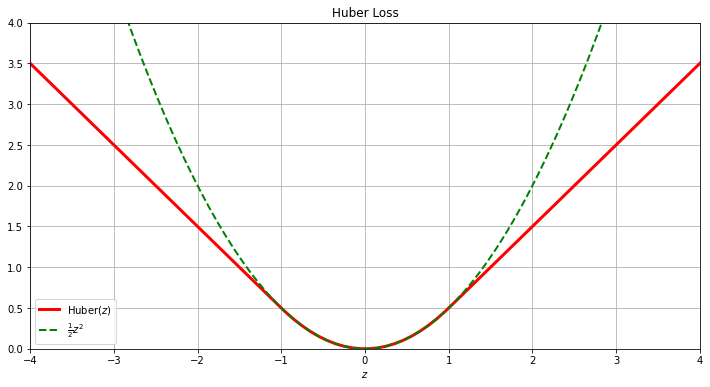

In [19]:
plt.figure(figsize=(12, 6))
z= np.linspace(-5, 5, 100)

plt.plot(z, huber_fn(0, z), 'r-', linewidth=3, label= 'Huber($z$)')
plt.plot(z, z**2/2, 'g--', linewidth=2, label=r'$\frac{1}{2}z^2$')
plt.title('Huber Loss', fontsize=12)
plt.xlabel('$z$')
plt.axis([-4, 4, 0, 4])
plt.grid('on')
plt.legend(fontsize=10)
plt.show()

# Saving and Loading Custom Models with Custom Components
When we save the model that uses a custom function Keras will save all the custom inputs too. However, when we load the model you will need to specify a dictionary and set the name of the function to the actual function (i.e. map the model's customer objects to the object). 

Concretely, lets use the California dataset to practice implementing the custom loss functions and loading models with custom components. 

In [20]:
#load data 
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#load data
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target.reshape(-1, 1), random_state=42)

#split into train and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

#Standard scale all input data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [21]:
#build model
model = keras.models.Sequential([
                                 keras.layers.Dense(30, activation= 'selu', kernel_initializer= 'lecun_normal', input_shape=X_train_scaled.shape[1:]),
                                 keras.layers.Dense(1)
])

#compile model-now all you have to do is set the loss when you compile a model
model.compile(loss= huber_fn, metrics= ['mae'], optimizer= 'nadam')

#fit the model 
model.fit(X_train_scaled, y_train, validation_data= (X_valid_scaled, y_valid),
          epochs=2, batch_size=1)

Epoch 1/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.2507 - mae: 0.5521 - val_loss: 0.2318 - val_mae: 0.5104
Epoch 2/2
11610/11610 [==============================] - 18s 2ms/step - loss: 0.1984 - mae: 0.4857 - val_loss: 0.2445 - val_mae: 0.5224


The loss shown above is the huber loss. Fortunetly, you can also use the .Huber in keras, see below

In [22]:
model_huber = keras.models.Sequential([
                                 keras.layers.Dense(30, activation= 'selu', kernel_initializer= 'lecun_normal', input_shape=X_train_scaled.shape[1:]),
                                 keras.layers.Dense(1)])
model_huber.compile(loss= keras.losses.Huber(), metrics= ['mae'], optimizer= 'nadam')

#fit the model 
model_huber.fit(X_train_scaled, y_train, validation_data= (X_valid_scaled, y_valid),
          epochs=2, batch_size=1)

Epoch 1/2
11610/11610 [==============================] - 25s 2ms/step - loss: 0.2337 - mae: 0.5306 - val_loss: 0.2176 - val_mae: 0.4979
Epoch 2/2
11610/11610 [==============================] - 32s 3ms/step - loss: 0.1929 - mae: 0.4773 - val_loss: 0.1823 - val_mae: 0.4633


Saving a model

In [23]:
model.save('my_custom_huber_loss.h5')

Now load the model again but specify the custom components 

In [24]:
model = keras.models.load_model('my_custom_huber_loss.h5',
                                custom_objects= {'huber_fn': huber_fn})
#we have to specify the name and assign it to the fucntion

With the Huber loss you can specify the $\delta$ value (i.e. the threshold) you can do the same with your custom function. 

In [25]:
#create a nested function
def create_huber(threshold=1.0):
  def huber_fn(y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < threshold
    squared_loss = tf.square(error) /2
    linear_loss = (tf.abs(error) -0.5 * threshold) * threshold
    return tf.where(is_small_error, squared_loss, linear_loss)
  return huber_fn

#compile model specifing the threshold
model.compile(loss= create_huber(threshold= 1.5), metrics= ['mae'], optimizer= 'nadam')

model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
          batch_size=1, epochs=2)

Epoch 1/2
11610/11610 [==============================] - 21s 2ms/step - loss: 0.2054 - mae: 0.4704 - val_loss: 0.2645 - val_mae: 0.5063
Epoch 2/2
11610/11610 [==============================] - 22s 2ms/step - loss: 0.1989 - mae: 0.4596 - val_loss: 0.2352 - val_mae: 0.4695


In [26]:
#save model and load it again 

model.save('my_custom_huber_loss2.h5')

In [27]:
#load the model specify the threshold value
model = keras.models.load_model('my_custom_huber_loss2.h5',
                                custom_objects= {'huber_fn': create_huber(2.0)})

In [28]:
model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
          batch_size=1, epochs=2)

Epoch 1/2
11610/11610 [==============================] - 22s 2ms/step - loss: 0.1968 - mean_absolute_error: 0.4528 - val_loss: 0.3358 - val_mean_absolute_error: 0.5140
Epoch 2/2
11610/11610 [==============================] - 23s 2ms/step - loss: 0.1987 - mean_absolute_error: 0.4524 - val_loss: 0.2530 - val_mean_absolute_error: 0.4599


The problem with this is having to remember the threshold value, instead you can create a subclass of the keras.losses.Loss class and using the .get_config() method, which returns a dictionary of each hyperparameter.

In [29]:
#create a subclass 
class HuberLoss(keras.losses.Loss):
  def __init__(self, threshold=1.0, **kwargs): #passes all to the parent constructor
    self.threshold = threshold
    super().__init__(**kwargs)
  
  #contains the loss
  def call(self, y_true, y_pred):
    error = y_true - y_pred
    is_small_error = tf.abs(error) < self.threshold
    squared_loss = tf.square(error) / 2
    linear_loss = self.threshold*(tf.abs(error) - self.threshold/2)
    return tf.where(is_small_error, squared_loss, linear_loss)
  
  #returns all the hyperparameters
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold} #add threshold to the returned hyperparameters



In [30]:
#create model
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1),
])

#compile model specifying the HuberLoss class created with threshold value
model.compile(loss= HuberLoss(2.0), optimizer='nadam', metrics= ['mae'])

#fit model
model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
          epochs=2, batch_size=1)

Epoch 1/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.2868 - mae: 0.5440 - val_loss: 0.2309 - val_mae: 0.4829
Epoch 2/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.2225 - mae: 0.4899 - val_loss: 0.2149 - val_mae: 0.4623


In [31]:
#save model
model.save('my_model_with_custom_loss_class.h5')

In [32]:
#load model, note that we do not need to specify the threshold just the class
model = keras.models.load_model('my_model_with_custom_loss_class.h5',
                                custom_objects= {'HuberLoss': HuberLoss})

In [33]:
model.fit(X_train_scaled, y_train, validation_data=(X_valid_scaled, y_valid),
          epochs=2, batch_size=1)

Epoch 1/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.2105 - mean_absolute_error: 0.4733 - val_loss: 0.2199 - val_mean_absolute_error: 0.4686
Epoch 2/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.2050 - mean_absolute_error: 0.4650 - val_loss: 0.2078 - val_mean_absolute_error: 0.4527


In [34]:
model.loss.threshold #you can even look at what the threshold is 

2.0

# Custom Activation Functions, Initializers and Regularizes and Constraints
Creating custom function for any of the above is easy, just like with losses you need to create a custom function that has inputs and outputs. 

When you save the model you will need to specify the objects as a dictionary in the custom_objects argument. 

Alternatively, you can create subclasses using keras.regularizers.Regular, keras.constraints.Constraint or keras.initializers.Initializers or keras.layers.Layer. But each has subtle differences, we can use the same approach as loss (i.e. .call() method) for losses, layers and activation functions. But __call__() method for regularizers and initializers.

The get_config() method contains a call to the parent constructor for losses but some classes do not save define the hyperparameters, therefore, you will be required to write the dictionary yourself.

An exmaple, of the $\ell_1$ regularizer is shown below, this is equivalent to keras.regularizers.l1(0.01).


In [35]:
class MyL1Regularizer(keras.regularizers.Regularizer):
  def __init__(self, factor):
    self.factor = factor

  def __call__(self, weights):
    return tf.reduce_sum(tf.abs(self.factor * weights))
  
  def get_config(self):
    return {'factor': self.factor}


In [36]:
#build model and use custom regularizer
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1, activation='softmax',
                       kernel_regularizer=MyL1Regularizer(0.01))])

model.compile(loss="mse", optimizer="nadam", metrics=["mae"])

model.fit(X_train_scaled, y_train, epochs=2,
          validation_data=(X_valid_scaled, y_valid))

Epoch 1/2
363/363 [==============================] - 1s 2ms/step - loss: 2.5396 - mae: 1.1628 - val_loss: 2.3885 - val_mae: 1.1228
Epoch 2/2
363/363 [==============================] - 1s 2ms/step - loss: 2.5115 - mae: 1.1628 - val_loss: 2.3862 - val_mae: 1.1228


In [37]:
model.save('my_model_with_customl1.h5')

In [38]:
model = keras.models.load_model('my_model_with_customl1.h5',
                                custom_objects= {'MyL1Regularizer': MyL1Regularizer})

# Custom Metrics
You even set the Huber loss as a metric. 

Note, the loss and metric is not the same, even if you set both to the same function. Without getting in to the details, Loss = metric * mean of sample weights (plus some floating point precision error)

During training each batch's metric will be computed along side it's mean across several batches. This is good for most cases but not all. Suppose, we would like to keep track of the precision. In such a scenario, we should use the **streaming metric** (stateful metric) which gradually updates batch after batch.


In [39]:
precision = keras.metrics.Precision()
precision([0, 1, 1, 1, 0, 1, 0, 1], [1, 1, 0, 1, 0, 1, 0, 1]) #6/8 matches so 0.8 precision

<tf.Tensor: shape=(), dtype=float32, numpy=0.8>

In [40]:
precision([0, 1, 0, 0, 1, 0, 1, 1], [1, 0, 1, 1, 0, 0, 0, 0]) #1/8 matches but the overall precision is 0.5

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [41]:
#you can see the current result by using the method
precision.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [42]:
precision.variables #number of true and false positives = 4$^2$. - 0²

[<tf.Variable 'true_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>,
 <tf.Variable 'false_positives:0' shape=(1,) dtype=float32, numpy=array([4.], dtype=float32)>]

In [43]:
class HuberMetrics(keras.metrics.Mean):
  def __init__(self, threshold=1.0, name= 'HuberMetric', dtype= None):
    self.threshold = threshold
    self.huber_fn = create_huber(threshold)
    super().__init__(name= name, dtype= dtype)

  def update_state(self, y_true, y_pred, sample_weight= None):
    metric = self.huber_fn(y_true, y_pred)
    super(HuberMetrics, self).update_state(metric, sample_weight)
  
  def get_config(self):
    base_config = super().get_config()
    return {**base_config, 'threshold': self.threshold}    

Lets use the Metric class we just created with the Huber loss. Note the difference in values. 

In [44]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)


model = keras.models.Sequential([
    keras.layers.Dense(30, activation="selu", kernel_initializer="lecun_normal",
                       input_shape=X_train_scaled.shape[1:]),
    keras.layers.Dense(1),
])

model.compile(loss= keras.losses.Huber(2.0), optimizer= 'nadam',
              weighted_metrics= [HuberMetrics(2.0)])


In [45]:
sample_weight = np.random.rand(len(y_train))
sample_weight #random weights

array([0.37454012, 0.95071431, 0.73199394, ..., 0.16710009, 0.0333932 ,
       0.38571671])

In [46]:
history = model.fit(X_train_scaled, y_train, epochs=2,
                    validation_data= (X_valid_scaled, y_valid),
                    sample_weight= sample_weight, batch_size=1)

Epoch 1/2
11610/11610 [==============================] - 20s 2ms/step - loss: 0.1442 - HuberMetric: 0.2905 - val_loss: 0.3259 - val_HuberMetric: 0.3259
Epoch 2/2
11610/11610 [==============================] - 19s 2ms/step - loss: 0.1119 - HuberMetric: 0.2254 - val_loss: 0.3546 - val_HuberMetric: 0.3546


In [47]:
history.history['loss']

[0.14416612684726715, 0.1118684858083725]

In [48]:
history.history['HuberMetric'][0] * sample_weight.mean() #loss ~ metrics * mean weights (precision error)

0.144166336791771

# Custom Layers
If you want to create an exotic layer then you can do so by using the keras.layers.Lambda() or by creating a subclass

In [49]:
basic_layer = keras.layers.Lambda(lambda x: 2*tf.exp(x)+5) #create a custom layer
basic_layer([-1., 0., 5.])

#exponential function are really good when inputs have huge differences in scale
#They are are really useful in output layers during regression

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([  5.735759,   7.      , 301.82632 ], dtype=float32)>

To build a layer with weights (i.e. a Stateful Layer) or exhibits different behaviour during training/testing then you need to create a class.

The example below can also be done by adding the keras.layers.GaussianNoise layer.

In [50]:
class MyGaussianLayer(keras.layers.Layer):
  def __init__(self, stddev, **kwargs):
    super().__init__(**kwargs)
    self.stddev = stddev

  def call(self, X, training= None):
    if training:
      noise = tf.random.normal(tf.shape(X), stddev=self.stddev)
      return X + noise
    else:
      return X

  def compute_out_shape(self, batch_input_shape):
    return batch_input_shape

# Custom Models
 You can create custom models and it is pretty easy to do. I have built one and trained it on the California data set. You can create more creative models using a similiar approach even models with a Residual Block.  


In [51]:
keras.backend.clear_session()

In [52]:
class CaliforniaModel(keras.Model):
  def __init__(self, output_dim, neurons=30, n_hidden= 3, **kwargs):
    super().__init__(**kwargs)

    self.hidden_layers = [keras.layers.Dense(neurons, activation= 'selu', kernel_initializer= 'lecun_normal') for _ in range(n_hidden)]

    self.out = keras.layers.Dense(output_dim)

  def call(self, inputs):
    Z = self.hidden_layers[0](inputs)
    for layer in self.hidden_layers[1:]:
      Z = layer(Z)
    return self.out(Z)

In [53]:
model = CaliforniaModel(output_dim=1, neurons=100, n_hidden=3)
model.compile(loss= 'mse', optimizer= 'nadam', metrics= ['mae'])
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=1,
                    validation_data= (X_valid_scaled, y_valid))

Epoch 1/10
11610/11610 [==============================] - 25s 2ms/step - loss: 0.6454 - mae: 0.5569 - val_loss: 4.2696 - val_mae: 0.5186
Epoch 2/10
11610/11610 [==============================] - 30s 3ms/step - loss: 0.4313 - mae: 0.4738 - val_loss: 0.3851 - val_mae: 0.3964
Epoch 3/10
11610/11610 [==============================] - 28s 2ms/step - loss: 0.4065 - mae: 0.4519 - val_loss: 0.3126 - val_mae: 0.4065
Epoch 4/10
11610/11610 [==============================] - 28s 2ms/step - loss: 0.4048 - mae: 0.4441 - val_loss: 0.9338 - val_mae: 0.7614
Epoch 5/10
11610/11610 [==============================] - 23s 2ms/step - loss: 0.3802 - mae: 0.4407 - val_loss: 0.4466 - val_mae: 0.5045
Epoch 6/10
11610/11610 [==============================] - 23s 2ms/step - loss: 0.3714 - mae: 0.4361 - val_loss: 1.7018 - val_mae: 0.4103
Epoch 7/10
11610/11610 [==============================] - 23s 2ms/step - loss: 0.3662 - mae: 0.4288 - val_loss: 0.3309 - val_mae: 0.4197
Epoch 8/10
11610/11610 [=================

In [54]:
model.summary()

Model: "california_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  900       
_________________________________________________________________
dense_1 (Dense)              multiple                  10100     
_________________________________________________________________
dense_2 (Dense)              multiple                  10100     
_________________________________________________________________
dense_3 (Dense)              multiple                  101       
Total params: 21,201
Trainable params: 21,201
Non-trainable params: 0
_________________________________________________________________


# Losses and Metrics Based on Model Internals
We have already seen how to create losses and metrics but you may want to **report the regularization of the model**. Concretely, monitor the weights or activations of neurons within hidden layers. This is similiar to the auxillary output we have seen previously, on the 1.Preceptron Notebook. 

We can create a custom model with an auxillary output at the upper hidden layer and calculate the loss. This is called the **Reconstruction Loss**, which is the mean squared difference reconstruction and the inputs - you can also think of this as the regularization loss. 



In [55]:
#create a model that has an auxillary output

class ReconstructingRegressor(keras.models.Model):
  def __init__(self, output_dim, **kwargs):
    super().__init__(**kwargs)
    self.hidden = [keras.layers.Dense(30, activation= 'selu',
                                      kernel_initializer= 'lecun_normal',) for 
                   _ in range(5)]
    self.out = keras.layers.Dense(output_dim)

    # self.reconstruction_mean = keras.metrics.Mean(name= 'Reconstruction_error')

  def build(self, batch_input_shape):
    n_inputs = batch_input_shape[-1]
    self.reconstruct = keras.layers.Dense(n_inputs)
    super().build(batch_input_shape)

  def call(self, inputs):
    Z = inputs
    for layer in self.hidden:
      Z = layer(Z)
    reconstruction = self.reconstruct(Z)
    recon_loss = tf.reduce_mean(tf.square(reconstruction - inputs))
    self.add_loss(0.05 * recon_loss)

    # if training: 
    #   result = self.reconstruction_mean(recon_loss)
    #   self.add_metric(result)
    return self.out(Z)

In [56]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [57]:
try:
  model = ReconstructingRegressor(1)
  model.compile(loss= 'mse', optimizer= 'nadam')
  model.fit(X_train_scaled, y_train, epochs= 3)

except Exception as exc:
  print('There was an Error Running this custom model.')
  print('Check Github: https://github.com/tensorflow/tensorflow/issues/26260')

Epoch 1/3
There was an Error Running this custom model.
Check Github: https://github.com/tensorflow/tensorflow/issues/26260


# Computing Gradients using Autodiff

In reality, you will not have to use any of this so I will not cover it in great detail. Essentially, TensorFlow has flexibility to calculate the gradients and stop gradients from backpropagating through some part of the neural network - use tf.stop_gradient() function - we can input custom gradient functions.

Below is an intuition on how TensoFlow uses a tape to compute the gradients.

In [58]:
def f(x, y):
  return 2 * x ** 2 + 4 * x * y # 2x^2 + 4xy 
#the partial derivatives are:
# df(x,y)/dx = 4x + 4y
# df(x,y)/dy = 4x

In [59]:
 #you find the partial derivatives by adding epsilon to the input
 x, y = 4, 3 #using the formulas above, 28 and 16
 eps= 1e-6
print((f(x + eps, y) - f(x, y)) / eps)
print((f(x, y + eps) - f(x, y)) / eps)

28.000002004091584
16.000000002236447


In [60]:
#Using this approach in a neural network would be intractable so you can use
#GradientTape
x, y = tf.Variable(4.), tf.Variable(3.) #can only use variables for tape
with tf.GradientTape() as tape:
  z = f(x, y)
gradients = tape.gradient(z, [x, y]) 
print(gradients)
#once you call the gradient the tape gets deleted so create another one OR
#set persistent= True
print()
try:
  tape.gradient(z, y)
except RuntimeError as ex:
  print(ex)

print()
with tf.GradientTape(persistent=True) as tape:
  z = f(x, y)

tape.gradient(z, y)
tape.gradient(z, x)

[<tf.Tensor: shape=(), dtype=float32, numpy=28.0>, <tf.Tensor: shape=(), dtype=float32, numpy=16.0>]

GradientTape.gradient can only be called once on non-persistent tapes.



<tf.Tensor: shape=(), dtype=float32, numpy=28.0>

# Custom Training Loops - Be cautious 

You can create your own training loop based on architectures from the latest research. For example, if you train the wide and deep model, you may want to use different optimizers for the deep and another for the wide part. The .fit() method uses only one optimizer so a custom loop is the way to go. If you have loops that need to behave different in training and testing (such as Dropout and BatchNormalization) then you need to add this into your function. 

In reality, you should stick to the .fit() method rather than making your own because its more error-prone and harder maintain, especially in a team environment. 

# TensorFlow Functions and Graphs
With all your custom functions and layers, you can still use TensorFlows automatic graph functionality. 

TensorFlow's tf.function can take a normal python function and convert it to a TensorFlow function which can then be used to create graph. For **complex computations TF Functions will perform much faster**, it optimizes the computation graph, pruning unused nodes and simplifies expressions. When you want to boost normal python functions, just transform it to a tf.function and see the performance boost. 
FYI Keras automatically converts custom loss functions, metrics, layers, and activation functions so you do not have to =). 


In [61]:
def quad(x):
  return x ** 4
quad(3)

81

In [62]:
tf_quad = tf.function(quad) #create a tensorflow function
tf_quad(tf.constant(3.0)) #returns a float32

<tf.Tensor: shape=(), dtype=float32, numpy=81.0>

In [63]:
#or you can you a decorator 
@tf.function
def quad(x):
  return x ** 4
quad(3) #returns a int32

<tf.Tensor: shape=(), dtype=int32, numpy=81>

# Autograph and Tracing 

TensoFlow generate graphs by capturing the Python function's source code, it looks at any control flow statements (i.e. while, for, if, break, continue and return) even operators, +, -, * etc. After capturing all the statements, Autograph upgrades these to TensorFlow operations such as tf.while_loop or tf.cond(). 



In [64]:
%load_ext tensorboard

In [65]:
%tensorboard --logdir logs

Reusing TensorBoard on port 6006 (pid 1608), started 1:05:11 ago. (Use '!kill 1608' to kill it.)

<IPython.core.display.Javascript object>

In [66]:
@tf.function
def add_10(x):
    condition = lambda i, x: tf.less(i, 10)
    body = lambda i, x: (tf.add(i, 1), tf.add(x, 1))
    final_i, final_x = tf.while_loop(condition, body, [tf.constant(0), x])
    return final_x
add_10(tf.constant(5))


<tf.Tensor: shape=(), dtype=int32, numpy=15>

In [67]:
add_10.get_concrete_function(tf.constant(5)).graph.get_operations()
#the graph.get_operations() gives all the control flow statements

[<tf.Operation 'x' type=Placeholder>,
 <tf.Operation 'Const' type=Const>,
 <tf.Operation 'while/maximum_iterations' type=Const>,
 <tf.Operation 'while/loop_counter' type=Const>,
 <tf.Operation 'while' type=StatelessWhile>,
 <tf.Operation 'Identity' type=Identity>]

In [68]:
tf.autograph.to_code(add_10.python_function) #used for debugging

"def tf__add_10(x):\n    do_return = False\n    retval_ = ag__.UndefinedReturnValue()\n    with ag__.FunctionScope('add_10', 'fscope', ag__.ConversionOptions(recursive=True, user_requested=True, optional_features=(), internal_convert_user_code=True)) as fscope:\n        condition = (lambda i, x: ag__.converted_call(tf.less, (i, 10), None, fscope))\n        body = (lambda i, x: (ag__.converted_call(tf.add, (i, 1), None, fscope), ag__.converted_call(tf.add, (x, 1), None, fscope)))\n        (final_i, final_x) = ag__.converted_call(tf.while_loop, (condition, body, [ag__.converted_call(tf.constant, (0,), None, fscope), x]), None, fscope)\n        try:\n            do_return = True\n            retval_ = fscope.mark_return_value(final_x)\n        except:\n            do_return = False\n            raise\n    (do_return,)\n    return ag__.retval(retval_)\n"

# TensorFlow Summary

I have attempted to keep this notebook brief, because in reality we will not be customizing any of the above. Based on my conversations with some data scientists, you would be applying just vanilla models rather than trying to experiment with the network architecture. If you do come across an outstanding model then you should refer to the paper's open source code. 

In summary, TensorFlow is faster than numpy, well suited for large-scale Machine learning, offers distributed computing, graph analysis & visualization and several other powerful APIs. 

Other Deep Learning libraries are PyTorch, Microsoft Cognitive tool-kit and Theano. 